In [13]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import matplotlib.pyplot as plt
from spleeter.audio.adapter import AudioAdapter

from IPython.display import Audio

In [2]:
# Testfile path
#file = '/data/fma_medium/037/037159.mp3'
file = '/data/fma_medium/037/037859.mp3'

In [6]:
# File Loader
audio_loader = AudioAdapter.default()
y, sr = audio_loader.load(file)
print(y.shape)
print(sr)

y = y.reshape(y.shape[1], y.shape[0])
print(y.shape)

Audio(y, rate=int(sr))

(1323119, 2)
44100
(2, 1323119)


/usr/local/lib/python3.6/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


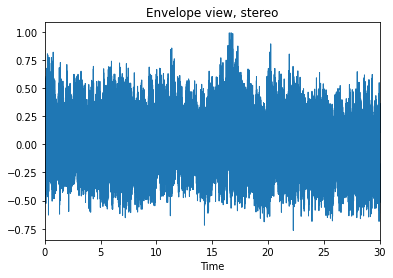

In [7]:
# Plot audio wave
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveplot(y, sr=44100, ax=ax)
ax.set(title='Envelope view, stereo')
ax.label_outer()

/usr/local/lib/python3.6/dist-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.6/dist-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.6/dist-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


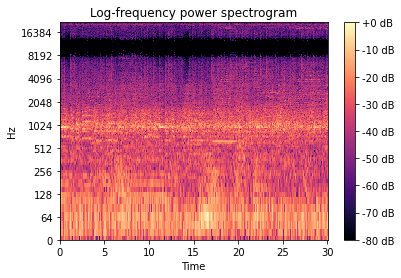

In [8]:
# Plot spectrogram
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.to_mono(y), hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [20]:
y_time_stretch = np.stack((
    librosa.effects.time_stretch(y[0], 1.2),
    librosa.effects.time_stretch(y[1], 1.2)
))

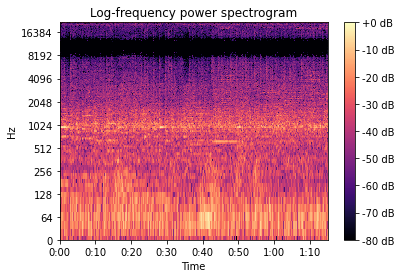

In [21]:
# Plot spectrogram
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(librosa.to_mono(y_time_stretch), hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")